# Query 4.1

mport the csv file of the stock which contained the Bollinger columns as well.
- Create a new column 'Call' , whose entries are - 
    'Buy' if the stock price is below the lower Bollinger band 
    
    - 'Hold Buy/ Liquidate Short' if the stock price is between the lower and middle Bollinger band 
    
    - 'Hold Short/ Liquidate Buy' if the stock price is between the middle and upper Bollinger band 
    
    - 'Short' if the stock price is above the upper Bollinger band


- Now train a classification model with the 3 bollinger columns and the stock price as inputs and 'Calls' as output. Check the accuracy on a test set. (There are many classifier models to choose from, try each one out and compare the accuracy for each)


- Import another stock data and create the bollinger columns. Using the already defined model, predict the daily calls for this new stock.

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



In [16]:
file = pd.read_csv('Module2.csv')

In [17]:
df = pd.DataFrame(file)

In [18]:
df.head()

,Date,Date.1,Symbol,Series,Date.1.1,Prev Close,Open Price,High Price,Low Price,Last Price,...,Deliverable Qty,% Dly Qt to Traded Qty,Month,Year,vwap,Day_Perc_Change,Trend,UpperBB,LowerBB,MiddleBB
0,2017-05-15,2017-05-15,INFY,EQ,2017-05-15,964.25,963.5,963.50,949.10,953.25,...,3052819,83.67,5,2017,951.550000,0.000000,Slight or No change,NaN,NaN,NaN
1,2017-05-16,2017-05-16,INFY,EQ,2017-05-16,951.55,953.1,960.15,946.95,956.00,...,1858063,60.62,5,2017,953.125077,0.003626,Slight or No change,NaN,NaN,NaN
2,2017-05-17,2017-05-17,INFY,EQ,2017-05-17,955.00,951.6,958.45,943.85,952.90,...,792251,54.35,5,2017,953.067084,-0.002304,Slight or No change,NaN,NaN,NaN
3,2017-05-18,2017-05-18,INFY,EQ,2017-05-18,952.80,943.0,973.90,942.85,960.25,...,2309450,57.32,5,2017,955.934447,0.009393,Slight or No change,NaN,NaN,NaN
4,2017-05-19,2017-05-19,INFY,EQ,2017-05-19,961.75,961.5,962.70,947.85,957.40,...,1457747,68.48,5,2017,956.233874,-0.003951,Slight or No change,NaN,NaN,NaN


In [19]:
df['Date'] = pd.to_datetime(df['Date.1'], format = '%Y-%m-%d')
df.index = df['Date']

In [20]:
df = df.drop(['Date.1', 'Date.1.1', 'Date'], axis = 1)

In [21]:
df.fillna(0, inplace = True)

In [22]:
df[13:]

,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,...,Deliverable Qty,% Dly Qt to Traded Qty,Month,Year,vwap,Day_Perc_Change,Trend,UpperBB,LowerBB,MiddleBB
Date,,,,,,,,,,,,,,,,,,,,,
2017-06-01,INFY,EQ,977.05,969.30,979.70,958.55,971.25,971.40,969.49,2754303,...,1822506,66.17,6,2017,971.400000,-0.005783,Slight or No change,1000.634068,936.708789,968.671429
2017-06-02,INFY,EQ,971.40,973.40,975.45,964.20,966.00,969.45,968.76,1958983,...,1396644,71.29,6,2017,970.589522,-0.002007,Slight or No change,1000.356528,939.543472,969.950000
2017-06-05,INFY,EQ,969.45,970.00,972.00,957.05,959.00,958.75,961.71,2731349,...,1941199,71.07,6,2017,966.245740,-0.011037,Slight or No change,1000.118940,940.316774,970.217857
2017-06-06,INFY,EQ,958.75,965.00,987.50,964.40,980.00,979.35,980.08,3504343,...,2018029,57.59,6,2017,970.439905,0.021486,Slight or No change,1000.590495,943.638076,972.114286
2017-06-07,INFY,EQ,979.35,985.00,988.90,945.00,959.30,961.30,963.75,6227523,...,2519343,40.45,6,2017,967.126136,-0.018431,Slight or No change,1000.609717,943.554569,972.082143
2017-06-08,INFY,EQ,961.30,962.95,962.95,948.15,956.05,956.45,952.81,3097676,...,1778850,57.43,6,2017,965.494937,-0.005045,Slight or No change,1000.741480,943.208520,971.975000
2017-06-09,INFY,EQ,956.45,938.55,950.95,923.00,949.00,948.60,937.55,7378831,...,3054942,41.40,6,2017,960.986752,-0.008207,Slight or No change,1002.007372,940.106913,971.057143
2017-06-12,INFY,EQ,948.60,943.35,965.20,940.10,964.40,963.85,953.95,4295838,...,2215716,51.58,6,2017,961.371744,0.016076,Slight or No change,1001.769383,941.280617,971.525000
2017-06-13,INFY,EQ,963.85,953.50,962.95,951.60,957.95,957.80,958.26,2468897,...,1449584,58.71,6,2017,961.115531,-0.006277,Slight or No change,1001.512045,941.966526,971.739286


In [23]:
def call(row):
    if row['Close Price'] < row['LowerBB']:
        val = "Buy"
    elif row['Close Price'] >= row['LowerBB'] and row['Close Price'] < row["MiddleBB"]:
        val = "Hold Buy/ Liquidate Short"
    elif row['Close Price'] >= row['MiddleBB'] and row['Close Price'] < row['UpperBB']:
        val = "Hold Short/Liquidate Buy"
    elif row['Close Price']>= row['UpperBB']:
        val = "Short"
    return val
    
    

Since the value of n is taken as 14 in the bollinger bands, the count for much more accurate Calls is used by taking the beginning for the call as the 14th row. 

In [24]:
df['Call'] = df[13:].apply(call, axis = 1) 
#(only from the place bollinger band is created)

In [25]:
df.Call.value_counts()

Hold Short/Liquidate Buy     250
Hold Buy/ Liquidate Short    189
Short                         28
Buy                           14
Name: Call, dtype: int64

### Applying Classification algorithms

In [26]:
X = df[['Close Price', 'UpperBB', 'LowerBB', 'MiddleBB']][13:]
y = df['Call'][13:]

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42)
# 40% data goes to the test case and the rest remains in the training set. 




In [29]:
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap

#### Comparing Classification algorithms for the train test set

In [30]:


def run_model( model, alg_name, plot_index):
    model.fit(X_train, y_train)
    
    #make pred for test:
    y_pred = model.predict(X_test)
    
    #Calc Accuracy score:
    
    accuracy = accuracy_score(y_test, y_pred) *100 
    
    #Assigning colours for the values in y_test:
    
    color_code = {'Buy': 'red', 'Short': 'Blue', 
                  'Hold Buy/ Liquidate Short': 'green', 
                  'Hold Short/Liquidate Buy': 'yellow'}
    
    #addint subplots now for all the different graphs
    
    ax = fig.add_subplot(4,2, plot_index)
    colors = [color_code[i] for i in y_test]
    
    
    ax.scatter(X_test.iloc[:,0], X_test.iloc[:,3], color=colors, marker='.', label='Circle = Ground truth')
    
    colors = [color_code[x] for x in y_pred]
    
    
    ax.scatter(X_test.iloc[:, 0], X_test.iloc[:,3], color=colors, marker='o', facecolors='none', label='Dot = Prediction')

    ax.legend(loc="lower right")
    
    leg = plt.gca().get_legend()
    leg.legendHandles[0].set_color('black')
    leg.legendHandles[1].set_color('black')
    leg.legendHandles[1].set_facecolors('none')

    ax.set_title(alg_name + ". Accuracy: " + str(accuracy))


In [31]:
!pip install xgboost

You should consider upgrading via the 'pip install --upgrade pip' command.


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset,

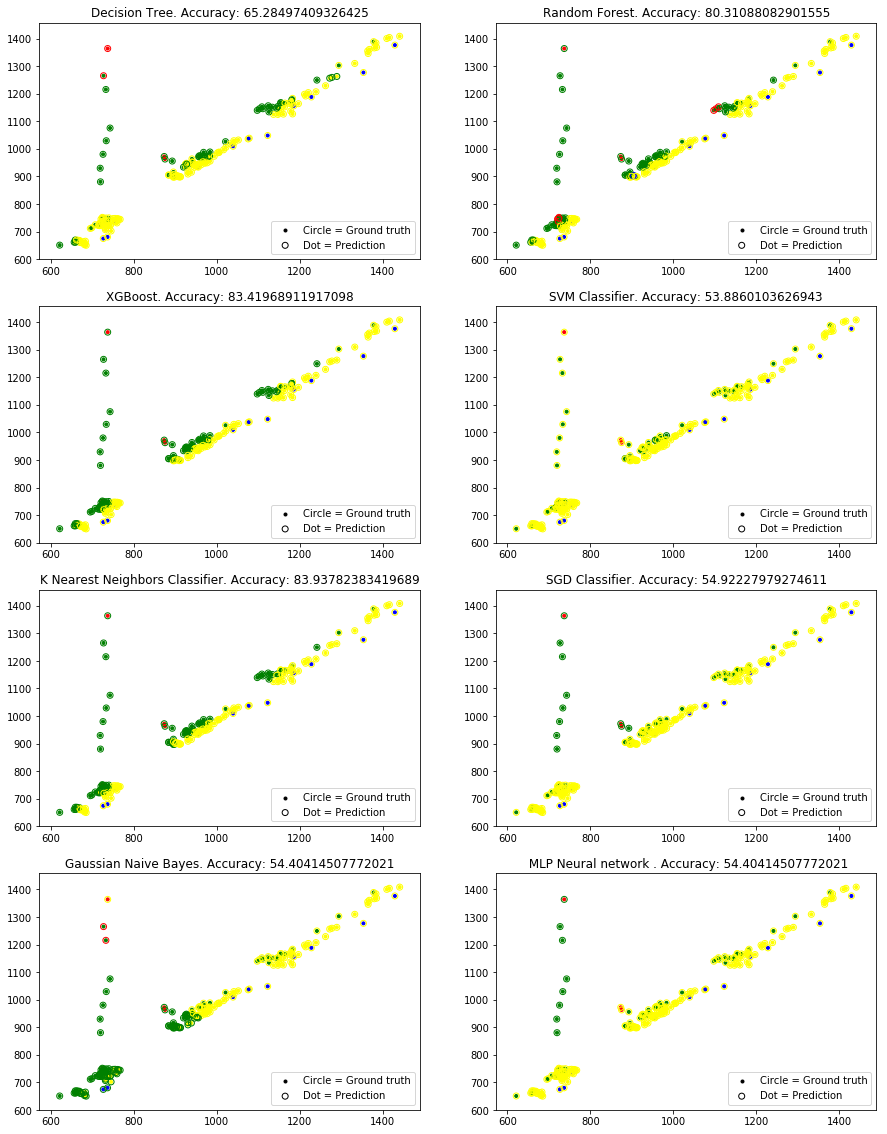

In [32]:
fig = plt.figure(figsize=(15,20))

#Decision Tree:

from sklearn import tree

model = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth =5)
run_model(model, "Decision Tree", 1)


# ----- Random Forest ---------------
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=10)
run_model(model, "Random Forest", 2)

# ----- xgboost ------------


from xgboost import XGBClassifier

model = XGBClassifier()
run_model(model, "XGBoost", 3)

# ------ SVM Classifier ----------------
from sklearn.svm import SVC
model = SVC()
run_model(model, "SVM Classifier", 4)

# -------- Nearest Neighbors ----------
from sklearn import neighbors
model = neighbors.KNeighborsClassifier()
run_model(model, "K Nearest Neighbors Classifier", 5)

# ---------- SGD Classifier -----------------
from sklearn.linear_model import SGDClassifier
from sklearn.multiclass import OneVsRestClassifier

model = OneVsRestClassifier(SGDClassifier())
run_model(model, "SGD Classifier", 6)

# --------- Gaussian Naive Bayes ---------
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
run_model(model, "Gaussian Naive Bayes", 7)

# ----------- Neural network - Multi-layer Perceptron  ------------
from sklearn.neural_network import MLPClassifier

model = MLPClassifier()
run_model(model, " MLP Neural network ", 8)

From the given plots, it can be noticed that for the given data K nearest Neighbours would give the best accuracy, with 83.9% as the accuracy. Thus, creating it's model as the default model:

In [33]:
model = neighbors.KNeighborsClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_pred, y_test) *100

print("The final model is K nearest Neighbours and the accuracy is: ", str(accuracy)[:4], "%")


The final model is K nearest Neighbours and the accuracy is:  83.9 %


#### Importing another stock and creating bollinger columns

In [34]:
file2 = pd.read_csv('Large_Cap/RELIANCE.csv')

In [35]:
df1 = pd.DataFrame(file2)

In [36]:
df1 = df1[df1.Series == 'EQ']

In [37]:
df1['Date'] = pd.to_datetime(df1['Date'], format = '%d-%b-%Y')
df1.index = df1['Date']

In [38]:
df1.head()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
Date,,,,,,,,,,,,,,,
2017-05-15,RELIANCE,EQ,2017-05-15,1350.45,1356.40,1356.40,1333.50,1343.60,1344.10,1344.22,1540213,2.070379e+09,75812,802733,52.12
2017-05-16,RELIANCE,EQ,2017-05-16,1344.10,1346.05,1376.90,1341.00,1356.20,1356.30,1360.59,2892947,3.936121e+09,79767,1238129,42.80
2017-05-17,RELIANCE,EQ,2017-05-17,1356.30,1353.00,1365.95,1347.75,1350.00,1353.10,1354.16,2250304,3.047263e+09,56277,1225837,54.47
2017-05-18,RELIANCE,EQ,2017-05-18,1353.10,1340.25,1350.00,1324.10,1327.45,1327.35,1336.14,2237916,2.990178e+09,84723,1339478,59.85
2017-05-19,RELIANCE,EQ,2017-05-19,1327.35,1333.00,1335.70,1310.00,1318.20,1318.85,1321.99,2928883,3.871940e+09,115988,1444387,49.32


In [39]:
def Bollinger(df, n):
    MA = df['Close Price'].rolling(window=n).mean()
    SD = df['Close Price'].rolling(window=n).std()
    df['UpperBB'] = MA + (2*SD)
    df['LowerBB'] = MA - (2*SD)
    return df

df1['MiddleBB'] = df1['Close Price'].rolling(14).mean()
n =14
REL = Bollinger(df1, n)


Thus, the Bollinger columns have been created. Using the already defined model, the prediction: 

In [40]:
df1.fillna(0, inplace=True)

In [41]:
rel_x = df1[['Close Price', 'UpperBB', 'LowerBB', 'MiddleBB']]


In [42]:
rel_pred = model.predict(rel_x)

In [43]:
df1['Call'] = rel_pred

In [44]:
df1['Call'].iloc[0:13] = "Not Available"

/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [45]:
df1.Call.value_counts()

Hold Short/Liquidate Buy     337
Hold Buy/ Liquidate Short    141
Not Available                 13
Short                          2
Buy                            1
Name: Call, dtype: int64

#### Predicted Data for Reliance Stock: 


In [46]:
df1

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,MiddleBB,UpperBB,LowerBB,Call
Date,,,,,,,,,,,,,,,,,,,
2017-05-15,RELIANCE,EQ,2017-05-15,1350.45,1356.40,1356.40,1333.50,1343.60,1344.10,1344.22,1540213,2.070379e+09,75812,802733,52.12,0.000000,0.000000,0.000000,Not Available
2017-05-16,RELIANCE,EQ,2017-05-16,1344.10,1346.05,1376.90,1341.00,1356.20,1356.30,1360.59,2892947,3.936121e+09,79767,1238129,42.80,0.000000,0.000000,0.000000,Not Available
2017-05-17,RELIANCE,EQ,2017-05-17,1356.30,1353.00,1365.95,1347.75,1350.00,1353.10,1354.16,2250304,3.047263e+09,56277,1225837,54.47,0.000000,0.000000,0.000000,Not Available
2017-05-18,RELIANCE,EQ,2017-05-18,1353.10,1340.25,1350.00,1324.10,1327.45,1327.35,1336.14,2237916,2.990178e+09,84723,1339478,59.85,0.000000,0.000000,0.000000,Not Available
2017-05-19,RELIANCE,EQ,2017-05-19,1327.35,1333.00,1335.70,1310.00,1318.20,1318.85,1321.99,2928883,3.871940e+09,115988,1444387,49.32,0.000000,0.000000,0.000000,Not Available
2017-05-22,RELIANCE,EQ,2017-05-22,1318.85,1326.50,1333.60,1315.20,1326.00,1324.15,1322.82,2011859,2.661318e+09,89828,1123947,55.87,0.000000,0.000000,0.000000,Not Available
2017-05-23,RELIANCE,EQ,2017-05-23,1324.15,1325.70,1329.85,1302.00,1304.55,1305.55,1313.55,2108223,2.769247e+09,81667,1172410,55.61,0.000000,0.000000,0.000000,Not Available
2017-05-24,RELIANCE,EQ,2017-05-24,1305.55,1307.50,1313.70,1295.10,1299.00,1297.70,1302.71,3274804,4.266122e+09,78535,1782580,54.43,0.000000,0.000000,0.000000,Not Available
2017-05-25,RELIANCE,EQ,2017-05-25,1297.70,1300.00,1312.40,1296.45,1301.50,1302.45,1303.19,5925335,7.721843e+09,114553,4678965,78.97,0.000000,0.000000,0.000000,Not Available


# Query 4.2

Now, we'll again utilize classification to make a trade call, and measure the efficiency of our trading algorithm over the past two years. For this assignment , we will use RandomForest classifier.

- Import the stock data file of your choice


- Define 4 new columns , whose values are: 
    - % change between Open and Close price for the day 
    - % change between Low and High price for the day 
    - 5 day rolling mean of the day to day % change in Close Price 
    - 5 day rolling std of the day to day % change in Close Price
    
    
- Create a new column 'Action' whose values are: 
    - 1 if next day's price(Close) is greater than present day's. 
    - (-1) if next day's price(Close) is less than present day's. 
    - i.e. Action [ i ] = 1 if Close[ i+1 ] > Close[ i ] 
    - i.e. Action [ i ] = (-1) if Close[ i+1 ] < Close[ i ]


- Construct a classification model with the 4 new inputs and 'Action' as target


- Check the accuracy of this model , also , plot the net cumulative returns (in %) if we were to follow this algorithmic model

In [47]:
file_new = pd.read_csv('Large_Cap/INFY.csv')

In [48]:
infy_df = pd.DataFrame(file_new)

In [49]:
infy_df = infy_df[infy_df.Series == 'EQ']
infy_df['Date'] = pd.to_datetime(infy_df['Date'], format = '%d-%b-%Y')
infy_df.index = infy_df['Date']


In [50]:
infy_df

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
Date,,,,,,,,,,,,,,,
2017-05-15,INFY,EQ,2017-05-15,964.25,963.50,963.50,949.10,953.25,951.55,951.49,3648582,3.471580e+09,75335,3052819,83.67
2017-05-16,INFY,EQ,2017-05-16,951.55,953.10,960.15,946.95,956.00,955.00,952.92,3065084,2.920775e+09,71808,1858063,60.62
2017-05-17,INFY,EQ,2017-05-17,955.00,951.60,958.45,943.85,952.90,952.80,949.48,1457754,1.384110e+09,75429,792251,54.35
2017-05-18,INFY,EQ,2017-05-18,952.80,943.00,973.90,942.85,960.25,961.75,962.61,4028924,3.878282e+09,120990,2309450,57.32
2017-05-19,INFY,EQ,2017-05-19,961.75,961.50,962.70,947.85,957.40,957.95,954.18,2128698,2.031155e+09,88897,1457747,68.48
2017-05-22,INFY,EQ,2017-05-22,957.95,958.40,966.90,956.55,960.00,961.45,962.29,2751526,2.647755e+09,99616,2034031,73.92
2017-05-23,INFY,EQ,2017-05-23,961.45,964.65,967.00,954.10,957.50,957.30,960.16,2019991,1.939515e+09,80122,1436389,71.11
2017-05-24,INFY,EQ,2017-05-24,957.30,960.00,965.50,949.60,957.00,954.80,958.37,2818143,2.700827e+09,56898,1913750,67.91
2017-05-25,INFY,EQ,2017-05-25,954.80,961.00,986.60,961.00,981.00,983.30,978.16,5219257,5.105250e+09,76160,4108984,78.73


In [51]:
infy_df['Pct_Change_OC'] = (infy_df['Close Price'] - infy_df['Open Price'])/infy_df['Open Price']  *100

#Using the pct change formula


In [52]:
infy_df['Pct_Change_LH'] = (infy_df['High Price']- infy_df['Low Price'])/infy_df['Low Price']  *100




In [53]:
infy_df['Rolling_Mean_Pct_Change'] = (infy_df['Close Price'].pct_change()).rolling(5).mean()
infy_df['Rolling_STD_Pct_Change'] = (infy_df['Close Price'].pct_change()).rolling(5).std()



infy_df.fillna(0, inplace=True)

In [54]:
infy_df["Action_temp"] = infy_df['Close Price'].shift(-1)
infy_df['Action'] = infy_df['Action_temp']> infy_df['Close Price']

infy_df['Action'] = infy_df['Action'].apply(lambda x: 1 if x==True else -1)




In [55]:
del infy_df['Action_temp']

In [56]:
infy_df


,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,Pct_Change_OC,Pct_Change_LH,Rolling_Mean_Pct_Change,Rolling_STD_Pct_Change,Action
Date,,,,,,,,,,,,,,,,,,,,
2017-05-15,INFY,EQ,2017-05-15,964.25,963.50,963.50,949.10,953.25,951.55,951.49,3648582,3.471580e+09,75335,3052819,83.67,-1.240270,1.517227,0.000000,0.000000,1
2017-05-16,INFY,EQ,2017-05-16,951.55,953.10,960.15,946.95,956.00,955.00,952.92,3065084,2.920775e+09,71808,1858063,60.62,0.199349,1.393949,0.000000,0.000000,-1
2017-05-17,INFY,EQ,2017-05-17,955.00,951.60,958.45,943.85,952.90,952.80,949.48,1457754,1.384110e+09,75429,792251,54.35,0.126103,1.546856,0.000000,0.000000,1
2017-05-18,INFY,EQ,2017-05-18,952.80,943.00,973.90,942.85,960.25,961.75,962.61,4028924,3.878282e+09,120990,2309450,57.32,1.988335,3.293207,0.000000,0.000000,-1
2017-05-19,INFY,EQ,2017-05-19,961.75,961.50,962.70,947.85,957.40,957.95,954.18,2128698,2.031155e+09,88897,1457747,68.48,-0.369215,1.566704,0.000000,0.000000,1
2017-05-22,INFY,EQ,2017-05-22,957.95,958.40,966.90,956.55,960.00,961.45,962.29,2751526,2.647755e+09,99616,2034031,73.92,0.318239,1.082013,0.002084,0.005337,-1
2017-05-23,INFY,EQ,2017-05-23,961.45,964.65,967.00,954.10,957.50,957.30,960.16,2019991,1.939515e+09,80122,1436389,71.11,-0.761934,1.352060,0.000495,0.005914,-1
2017-05-24,INFY,EQ,2017-05-24,957.30,960.00,965.50,949.60,957.00,954.80,958.37,2818143,2.700827e+09,56898,1913750,67.91,-0.541667,1.674389,0.000434,0.005952,1
2017-05-25,INFY,EQ,2017-05-25,954.80,961.00,986.60,961.00,981.00,983.30,978.16,5219257,5.105250e+09,76160,4108984,78.73,2.320499,2.663892,0.004525,0.014517,1


In [57]:
X = infy_df[['Pct_Change_OC', 'Pct_Change_LH', 'Rolling_Mean_Pct_Change', 'Rolling_STD_Pct_Change']]
y = infy_df['Action']



In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42)
# 40% data goes to the test case and the rest remains in the training set. 




In [59]:
from sklearn.ensemble import RandomForestClassifier

In [60]:
model = RandomForestClassifier(10)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_pred, y_test) *100

print("The accuracy of Random Forest Classifier is", accuracy,"%")


The accuracy of Random Forest Classifier is 41.91919191919192 %


Plotting the net cumulative returns in %

Text(0,0.5,'Strategic Returns')

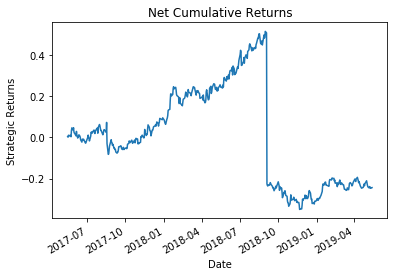

In [61]:
infy_df['Day_Perc_Change'] = infy_df['Close Price'].pct_change()

daily_cr = ((infy_df['Day_Perc_Change']+1).cumprod()-1).plot(title = "Net Cumulative Returns")
daily_cr.set_ylabel("Strategic Returns")


In [ ]:
,